In [1]:
from utils import *


In [2]:
qubits = cirq.GridQubit.rect(2, 2)
num_circuits = 10
depth = 40
random_seed = 1024

random_circuits, pattern = gen_random_circuits_without_measurements(
    qubits, 
    depth=depth, 
    num_circuits=num_circuits, 
    seed=random_seed
)

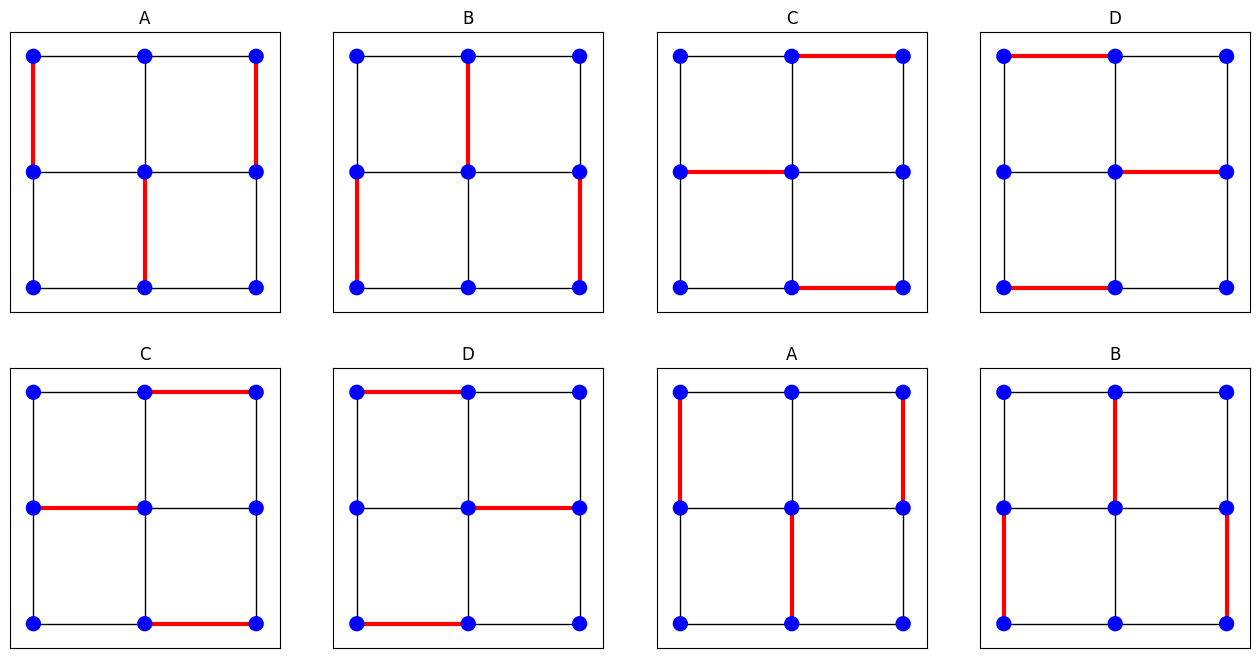

In [9]:
plot_grid_interaction_layers(pattern[:8], qubits)

In [9]:
cycles=[1, 3, 5, 7, 9, 11, 13]
results = simulate_statevector(
    circuit=random_circuits[0], 
    cycles=cycles
)

In [10]:
xeb = [
    linear_xeb_between_statevector(result, result)
    for result in results
]
xeb

[0.8125,
 0.46533238887786865,
 0.6661010980606079,
 0.6841728687286377,
 0.9729363918304443,
 1.328216552734375,
 0.6352841854095459]

In [3]:
inject_noise(random_circuits[0], 0.1)

(0, 0): ───Y^0.5───PhXZ(a=0.225,x=-0.0791,z=0.113)──────FSim(0.5π, 0.167π)───X^0.5───────────PhXZ(a=-1.87,x=-0.0469,z=0.0452)──────────────────────────Y^0.5───────────PhXZ(a=-0.875,x=-0.00332,z=-0.221)────────────────────────X^0.5───────────PhXZ(a=-2.0,x=0.00512,z=0.0563)─────FSim(0.5π, 0.167π)───PhX(0.25)^0.5───PhXZ(a=-2.07,x=-0.00436,z=-0.0483)────────────────────────Y^0.5───────────PhXZ(a=-1.77,x=-0.0866,z=-0.0267)───FSim(0.5π, 0.167π)───PhX(0.25)^0.5───PhXZ(a=-2.43,x=-0.1,z=-0.0528)─────FSim(0.5π, 0.167π)───Y^0.5───────────PhXZ(a=-0.381,x=0.0633,z=0.015)────────────────────────────PhX(0.25)^0.5───PhXZ(a=-1.09,x=-0.0892,z=0.00265)────FSim(0.5π, 0.167π)───Y^0.5───────────PhXZ(a=-0.715,x=0.108,z=-0.000573)────────────────────────PhX(0.25)^0.5───PhXZ(a=-1.27,x=-0.048,z=-0.107)─────────────────────────X^0.5───────────PhXZ(a=-2.95,x=-0.00266,z=0.0283)───FSim(0.5π, 0.167π)───Y^0.5───────────PhXZ(a=-0.669,x=-0.189,z=-0.0579)────────────────────────X^0.5───────────PhXZ(a=-0.819,x=-0.139,z=-0.097)───FSim(0.5π, 0.167π)───PhX(0.25)^0.5───PhXZ(a=0.819,x=-0.0238,z=-0.163)───FSim(0.5π, 0.167π)───Y^0.5───────────PhXZ(a=-0.985,x=0.0489,z=0.00581)─────────────────────────PhX(0.25)^0.5───PhXZ(a=-1.25,x=0.07,z=0.00139)────────FSim(0.5π, 0.167π)───Y^0.5───PhXZ(a=-0.696,x=-0.147,z=0.076)────────────────────────PhX(0.25)^0.5───PhXZ(a=-1.07,x=0.054,z=-0.127)───────────────────────────X^0.5───────────PhXZ(a=0.0605,x=-0.0809,z=-0.0759)───FSim(0.5π, 0.167π)───PhX(0.25)^0.5───PhXZ(a=1.33,x=-0.0913,z=0.138)────────────────────────────Y^0.5───────────PhXZ(a=0.237,x=0.151,z=0.0573)─────FSim(0.5π, 0.167π)───PhX(0.25)^0.5───PhXZ(a=-0.626,x=-0.000442,z=0.075)───FSim(0.5π, 0.167π)───Y^0.5───────────PhXZ(a=-0.0746,x=0.0456,z=-0.0806)────────────────────────X^0.5───────────PhXZ(a=-0.0838,x=-0.0196,z=-0.114)───FSim(0.5π, 0.167π)───Y^0.5───────────PhXZ(a=-3.05,x=-0.232,z=-0.0618)────────────────────────X^0.5───PhXZ(a=-0.718,x=-0.0194,z=-0.0438)────────────────────────Y^0.5───────────PhXZ(a=-1.53,x=-0.056,z=0.0984)───────FSim(0.5π, 0.167π)───X^0.5───PhXZ(a=-1.88,x=0.169,z=0.11)────────────────────────────Y^0.5───────────PhXZ(a=-3.04,x=0.0741,z=-0.134)─────FSim(0.5π, 0.167π)───X^0.5───────────PhXZ(a=-1.7,x=0.0855,z=0.044)────────FSim(0.5π, 0.167π)───Y^0.5───PhXZ(a=-2.03,x=0.00796,z=-0.0824)────────────────────────X^0.5───────────PhXZ(a=0.0599,x=0.00905,z=0.00385)───FSim(0.5π, 0.167π)───PhX(0.25)^0.5───PhXZ(a=-2.17,x=0.0199,z=-0.0285)───────────────────────────X^0.5───PhXZ(a=0.816,x=0.129,z=-0.0339)───────────────────────────Y^0.5───────────PhXZ(a=-1.76,x=-0.0353,z=-0.0402)────FSim(0.5π, 0.167π)───PhX(0.25)^0.5───PhXZ(a=-1.97,x=-0.119,z=-0.154)─────────────────────────X^0.5───────────PhXZ(a=-1.31,x=-0.0248,z=0.178)────FSim(0.5π, 0.167π)───PhX(0.25)^0.5───PhXZ(a=-1.21,x=-0.0498,z=0.0425)───FSim(0.5π, 0.167π)───X^0.5───────────PhXZ(a=-1.63,x=0.099,z=0.0393)───────────────────────────PhX(0.25)^0.5───
                                                        │                                                                                                                                                                                                                            │                                                                                                                                                  │                                                                       │                                                                                                                                                    │                                                                                                                                                                                                                          │                                                                                                                                                │                                                                       │     